In [5]:
from IPython.display import set_matplotlib_formats
set_matplotlib_formats('pdf', 'svg')

# Anotações primeiro contato com sklearn (scikit.learn)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

### Fresh Start: 

* https://archive.ics.uci.edu/ml/index.php 
> Repositório aberto com datasets que podem ser usados para treinar ML, praticar e como propósitos didáticos - sempre que possível, podemos utilizar esse site como base para os projetos que quisermos executar ou postagens em formato de blog.

Nesse notebook, vamos trabalhar um projeto envolvendo o dataset da UCI: 
[Car Evaluation Data Set](https://archive.ics.uci.edu/ml/datasets/Car+Evaluation) 

Todavia, vamos rodar algumas celulas antes com diversos outros datasets, tanto do UCI quando amostras para teste da própria scikit.learn no intuito ne nos aprofundarmos mais com a lib skilearn.

Antes de escrevermos algo, dessa vez vamos atentar a como salvar um modelo já treinado e reutilizar ele em outras run's (vide o projeto de aprendizagem de texto que fiz anteriormente, que ficou claro o quanto demora para treinar e rodar um modelo por si só- principalmente sem uma GPU muito eficiente) 



In [ ]:
# Primeiramente importar esse modulo
from sklearn.externals import joblib

#Digamos que a run do modelo seja
clf.fit = (X_train, y_train)

#após treinar o modelo, fazemos: 
filename = 'model.sav'
joblib.dump(clf,filename)

#da próxima vez que for rodar o modelo, del no save.script e roda
clf = joblib.load(filename)  

### Split de treino: 

Dado um dataset (100% dos dados que temos disponíveis) Podemos usar alguns métodos para utilizar esses dados não só para treinar nosso modelo, mas também para testar a acurácia do mesmo. Para isso, reservamos alguma quantidade específica no nosso sampling para verificar como o predict do nosso modelo infere algo corretamente sobre eles antes de ter conhecimento dos mesmos.


In [ ]:
from sklearn import datasets
import numpy as np

iris = datasets.load_iris()
#split in features and labels
X = iris.data
y = iris.target

print(X.shape)
print(y.shape)

(150, 4)
(150,)


In [ ]:
#hours of study vs good/bad grades
#10 diff students
#train with 8 students
#predict with remaining 2
#level of accuracy ^^

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2) #definindo o grupo de teste como 20% do dataset

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(120, 4)
(30, 4)
(120,)
(30,)


### NNC: method - Nearest Neighbors Classification


- Tem interesse em visualizar o que estamos falando nessa sessão? rode `/spyder/programs/knn_iris_classifier.py`

"O algoritmo KNN assume que coisas semelhantes existem nas proximidades. Em outras palavras, coisas semelhantes estão próximas umas das outras."



como calcula a proximidade de uma N dimensão? Existem várias técnicas para o cálculo da distância

* Euclidean

* Hamming

* Manhattan

* Mahalanobis

* Minkowski

A mais utilizada é a distância Euclidiana, e uma ótima maneira de explicar ela é utilizar a distância Manhattan para exemplificar a diferença entre elas.

A **distância euclidiana** representa a distância mais curta entre dois pontos. A **distância de Manhattan** é a soma das diferenças absolutas entre os pontos em todas as dimensões.

A **distância de Hamming** calcula a distância entre dois vetores binários. Essa técnica acaba sendo uma boa opção para casos de variáveis categóricas (one-hot).

A **distância de Mahalanobis** é a distância entre dois pontos no espaço multivariado. Em caso de variáveis não correlacionadas a distância Euclidiana acaba resultando a mesma coisa que a distância Mahalanobis. Porém quando temos mais de duas variáveis correlacionadas, pode se tornar impossível traçar a distância entre eles com um única reta. 

#### Hiperparâmetros da função KNN

* **N-neighbourd** > número de vizinhos a serem considerados

* **Algoritmo** > A opções ‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’ são algoritmos disponíveis para calcular o vizinho mais próximo. A opção ’auto’ deixa a cargo do algoritmo escolher qual tecnica é a mais adequada para aquele determinado problema, olhando para o resultado obtido nas observações anteriores. Já o algoritmo ’ball_tree’, é aconselhável utilizar para problemas com grande número de dimensões, diferente do ‘kd_tree’. Em contrapartida, o custo computacional é maior. A vantage do ‘kd_tree’ é em cima do ‘brute’ em problemas BigData com muitas observações, já que ele utiliza o conhecimento prévio adquirido das distâncias anteriores para inferir. A ideia básica é que se o ponto A está muito distante do ponto B e o ponto B está muito próximo do ponto C, então sabemos que os pontos A — C estão muito distantes, sem ter que calcular explicitamente sua distância. E por fim, ’brute’ calcula a distância de todos os pontos possíveis.

* **Leaf size** > Quanto maior, mais rápido será o processamento pois os grupos de amostras serão grande o suficiente para formação de poucos nós. O momento que você precisa se preocupar com esse parâmetro é quando o conjunto de dados é muito grande e o algoritmo escolhido for ’brute’. Seu valor de amostra default é 30.

* **p** > 1 ativa a utilização da distância de Manhattan e 2 da distância Euclidiana. Caso não seja inserido nenhum input, distância de minkowski será ativada que é a generalização das distâncias de Manhattan e Euclidiana.

* **Metric** > Esse parâmetro escolhemos o tipo de distância que mais se adequa para o problema em questão. O site do scikit-learn tem ótimas tabelas para ilustrar as medidas de distância e o tipo de problema que são utilizadas.

* **Weight** > é o inverso da distância que pode ser configurado de três maneiras: ‘uniform’, ‘distance’ e callable. Uniform usa o mesmo pedo para todas os vizinhos. Distance já atribui pesos maiores para os vizinhos mais próximos. Por fim, callable você incorpora uma função em específico.

Referências e mais detalhes: 
- https://medium.com/data-hackers/knn-k-nearest-neighbor-o-que-%C3%A9-aeebe0f833eb

- https://link.springer.com/article/10.1007/s42452-019-1329-z

- https://scikit-learn.org/stable/modules/neighbors.html#neighbors

Vamos agora usar o que aprendemos até aqui como prometido aplicado no dataset da avaliação de carros da UCI. Para isso, vamos usar as seguintes linhas em nosso código, além das bibliotecas exportadas: 

```Python 
from google.colab import drive
drive.mount('/content/drive/content/drive/My Drive/file.txt')
```

Isso  irá pedir para abrir um URL que autorizará a montagem para esse notebook depois de copiar e colar o token de onde você salvará o arquivo baixado com o "car.data" no seu drive.

Vamos testar a leitura do arquivo:

In [ ]:
import numpy as np
import pandas as pd
from sklearn import neighbors, metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

from google.colab import drive
drive.mount('/content/drive')

data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/car.data')
print(data.head())

Mounted at /content/drive
  buying  maint doors persons lug_boot safety  class
0  vhigh  vhigh     2       2    small    low  unacc
1  vhigh  vhigh     2       2    small    med  unacc
2  vhigh  vhigh     2       2    small   high  unacc
3  vhigh  vhigh     2       2      med    low  unacc
4  vhigh  vhigh     2       2      med    med  unacc


Após printar o dataframe.head() com pandas, notei que o arquivo não tinha título em suas colunas, então abri o car.data no meu pc como um .txt no bloco de notas e adicionei um titulo para cada uma das colunas e printei o dataframe.head() novamente como como ficou acima.

Prosseguindo então para os nossos testes

In [ ]:
#LABELING OUR DATA
X = data[[
     'buying',
     'maint',
     'safety'     
]].values

y = data[['class']]
print(X,y)

[['vhigh' 'vhigh' 'low']
 ['vhigh' 'vhigh' 'med']
 ['vhigh' 'vhigh' 'high']
 ...
 ['low' 'low' 'low']
 ['low' 'low' 'med']
 ['low' 'low' 'high']]       class
0     unacc
1     unacc
2     unacc
3     unacc
4     unacc
...     ...
1723   good
1724  vgood
1725  unacc
1726   good
1727  vgood

[1728 rows x 1 columns]


In [ ]:
#REARANGING OUR DATA
#converting the data(X) > LabelEncoder transf labels into numbers

Le = LabelEncoder()
for i in range(len(X[0])):
  X[:, i] = Le.fit_transform(X[:, i])
print(X)

#converting the data (y) using mapping to apply KNN
label_mapping = {
    'unacc':0,
    'acc':1,
    'good':2,
    'vgood':3
}
y['class'] = y['class'].map(label_mapping)
y = np.array(y)
print(y)

[[3 3 1]
 [3 3 2]
 [3 3 0]
 ...
 [1 1 1]
 [1 1 2]
 [1 1 0]]
[[0]
 [0]
 [0]
 ...
 [0]
 [2]
 [3]]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
#CREATING OUR MODEL
knn = neighbors.KNeighborsClassifier(n_neighbors= 25, weights= 'uniform')

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

knn.fit(X_train, y_train)

prediction = knn.predict(X_test)
accuracy = metrics.accuracy_score(y_test, prediction)
print("predictions: ", prediction)
print("accuracy: ", accuracy)

predictions:  [0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 1 1 1 0 0 2 1 0 0 1 1 0 1 1 1 0 0 0 1 0 0
 0 1 0 0 0 0 0 2 2 2 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 0 0
 0 0 3 0 1 0 0 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 0 0 0 0 0 0 0 0 2 1 0 0 0 0 1
 2 1 2 1 3 1 0 0 0 2 1 0 0 0 3 0 0 3 0 1 1 0 1 0 0 0 0 0 2 0 0 1 0 0 1 1 0
 1 1 1 0 0 0 0 0 1 0 0 3 0 0 0 3 3 0 0 0 1 0 0 1 2 0 0 0 1 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 2 1 0 1 0 1 0 0 2 1 2 0 2 0 1 0 0 1 2 0 1 0 0 0 0 0 2 0 0 0
 3 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 1 0 0 0 3 0 0 0 0 0 0 0 1 0 1 0 0 0 1
 1 2 0 0 1 0 1 0 0 1 0 2 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 2 0 0 0 0 0
 3 0 0 1 0 0 0 2 0 0 0 1 0 1 0 0 1 1 0 0 0 0 1 0 0 0 1 0 0 0 0 2 0 0 0 0 3
 1 0 1 0 0 0 3 0 0 0 2 0 0]
accuracy:  0.7543352601156069


/usr/local/lib/python3.7/dist-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [ ]:
#testing for a spefic case:
a = 1727
print("actual value: ", y[a])
print("predicted value: ", knn.predict(X)[a])

actual value:  [3]
predicted value:  3


No código de visualização a parte, coloco também de forma prática a diferença de precisão entre usar na função de KNN  os pesos `uniform` e `distance`, que podem determinar a escolha de qual algoritmo o usuário queira utilizar a depender do sistema analisado.

## Support Vector Machine - SVM

- Tem interesse em visualizar o que estamos falando nessa sessão? rode `/spyder/programs/SVM_iris_plotting.py`

> support-vector machines (SVMs, also support-vector networks) são modelos de aprendizado supervisionado com algoritmos de aprendizado associados que analisam dados para classificação e análise de regressão (Algoritmos matemáticos mais sofisticados que o mapeamento de proximidade que fizemos com KNN). 

*  Nesta página da documentação oficial: https://scikit-learn.org/stable/modules/svm.html - é possivel ter acesso a diversos exemplos de aplicação assim como exlpicações dos formalismos matemáticos do algoritmo. 

Uma SVM constrói um hiperplano ou conjunto de hiperplanos em um espaço dimensional alto ou infinito, que pode ser usado para classificação, regressão ou outras tarefas. Intuitivamente, uma boa separação é alcançada pelo hiperplano que possui a maior distância para os pontos de dados de treinamento mais próximos de qualquer classe (a chamada margem funcional), *pois em geral quanto maior a margem menor o erro de generalização do classificador*. 

Existem Amostras ditas linearmente separáveis, e amostras ditas "polinomialmente" separáveis. Em geral, quando o problema não é linearmente separável, os vetores de suporte são as amostras dentro dos limites das margens. 

- Prós: 
  - Funciona muito bem com margem de separação clara. 
  - É eficaz nos casos em que o número de dimensões é maior que o número de amostras.
  - Ele usa um subconjunto de pontos de treinamento na função de decisão (chamados de vetores de suporte), portanto, também é eficiente em termos de memória.

- Contras:
  - Não tem um bom desempenho quando temos um grande conjunto de dados porque o tempo de treinamento necessário é grande. 
  - Ele também não funciona muito bem quando o conjunto de dados tem mais ruído, ou seja, as classes de destino estão sobrepostas.


Vamos aplicar a função SVM que vem imbutida na nossa lib .scikit-learn, utilizando o dataset da iris que usamos para entender o split de treino anteriormente:  

In [ ]:
from sklearn import datasets
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

iris = datasets.load_iris()

#split in features and labels
X = iris.data
y = iris.target

classes = ['Iris Setosa', 'Iris Versicolour', 'Iria Virginica']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model =  svm.SVC()
model.fit(X_train, y_train)

print(model)

predictions = model.predict(X_test)
acc = accuracy_score(y_test, predictions)
print('predictions: ', predictions)
print('actual value:', y_test)
print('accuracy: ', acc)


SVC()
predictions:  [1 1 0 0 2 0 2 0 0 1 2 0 0 1 0 2 2 2 1 1 0 2 0 2 2 2 0 1 2 1]
actual value: [1 1 0 0 2 0 2 0 0 1 2 0 0 1 0 2 1 1 1 1 0 2 0 2 2 2 0 1 2 1]
accuracy:  0.9333333333333333


Precisão da utilização de SVM é nitidamente absurdamente boa!!! Comparando o desempenho que obtivemos agora com o modelo anterior, fica claro a diferença de aplicabilidade dado a eficiência.

Perceba que podemos analisar individualmente os nomes(classes) preditos pelo nosso modelo em cada iteração simplesmente iterando e observando as classes atribuidas a label do nosso modelo: 

In [ ]:
for i in range(len(predictions)):
  print(classes[predictions[i]])

Iria Virginica
Iris Setosa
Iris Setosa
Iria Virginica
Iria Virginica
Iria Virginica
Iris Versicolour
Iria Virginica
Iria Virginica
Iris Setosa
Iria Virginica
Iris Setosa
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Setosa
Iris Versicolour
Iris Setosa
Iris Versicolour
Iria Virginica
Iris Versicolour
Iris Versicolour
Iris Versicolour
Iris Setosa


Podemos também visualizar de forma efetiva diversos tipos de SVM diferentes em um formato comparativo no mesmo sistema que acabamos de tratar, de forma a perceber as sutilezas e particularidades de cada um deles.

Vamos executar a seguinte celula no intuito de observar a separação Linear das amostras e da máquina, assim como polinomial e a famosa RBF (a mais precisa e padrão do modelo, que rodou quando executamos o código acima)

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.inspection import DecisionBoundaryDisplay


# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data[:, :2]
y = iris.target

# we create an instance of SVM and fit out data. We do not scale our
# data since we want to plot the support vectors
C = 1.0  # SVM regularization parameter
models = (
    svm.SVC(kernel="linear", C=C),
    svm.LinearSVC(C=C, max_iter=10000),
    svm.SVC(kernel="rbf", gamma=0.7, C=C),
    svm.SVC(kernel="poly", degree=3, gamma="auto", C=C),
)
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = (
    "SVC with linear kernel",
    "LinearSVC (linear kernel)",
    "SVC with RBF kernel",
    "SVC with polynomial (degree 3) kernel",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:, 1]

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        X,
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel=iris.feature_names[0],
        ylabel=iris.feature_names[1],
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)

plt.show()

![image.png](https://scikit-learn.org/stable/_images/sphx_glr_plot_iris_svc_001.png)

## Linear Regression 
- Tem interesse em visualizar o que estamos falando nessa sessão? rode `/spyder/programs/lin_reg_plot.py`

A análise de **Regressão Linear** é um método estatístico utilizado para investigar a relação existente entre variáveis, sendo essas variáveis chamadas de **variáveis dependentes** e **variáveis independentes**. Essa análise é realizada através da construção de uma equação, a qual vamos chamar daqui pra frente de modelo. Esse modelo, vai associar a variável dependente à variável independente e recebe a denominação de **Modelo de Regressão Linear Simples (MRLS)**. No MRLS vamos estudar a relação linear entre duas variáveis quantitativas, ou seja, iremos assumir uma relação causal entre duas variáveis contínuas.

Essa análise pode ser usada, por exemplo, para descrever a relação entre variáveis para entender um processo ou fenômeno, para prever o valor de uma variável a partir do conhecimento dos valores das outras variáveis, para substituir a medição de uma variável pela observação dos valores de outras variáveis, e para controlar os valores de uma variável em uma faixa de interesse. 

Para se estimar o valor esperado, usa-se de uma equação, que determina a relação entre ambas as variáveis.[[1]](https://pt.wikipedia.org/wiki/Regress%C3%A3o_linear)

$$y_i = \alpha + \beta X_i + \epsilon_i ,$$ 

onde $y_i$ é a variável explicada (dependente); representa o que o modelo tentará prever. $\alpha$ é uma constante, que representa a interceptação da reta com o eixo vertical, $\beta$ representa a inclinação (coeficiente angular) em relação à variável explicativa e $X_i$ a variável explicativa (independente).

$\epsilon_i$ Representa todos os factores residuais mais os possíveis erros de medição. O seu comportamento é aleatório, devido à natureza dos factores que encerra. Para que essa fórmula possa ser aplicada, os erros devem satisfazer determinadas hipóteses, que são: terem distribuição normal, com a mesma variância ($\sigma^2$) independentes e independentes da variável explicativa $X$.

Para a análise nessa sessão, iremos utilizar um dataset com dados de habitação no estado de Boston ([boston housing data](https://www.cs.toronto.edu/~delve/data/boston/bostonDetail.html) ) Visto a grande variabilidade de parâmetros que estão disponíveis nesse data set e seu nível de detalhes. A disposição de dados no mesmo está na seguinte forma: 

* Variáveis: existem 14 atributos em cada case do dataset. Eles são:
  * CRIM - taxa de criminalidade per capita por cidade

  * ZN - proporção de terrenos residenciais zoneados para lotes acima de 25.000 m².

  * INDUS - proporção de acres de negócios não varejistas por cidade.

  * CHAS - Variável fictícia Charles River (1 se o lugar limita o rio; 0 caso contrário)

  * NOX - concentração de óxidos nítricos (partes por 10 milhões)

  * RM - número médio de cômodos por domicílio

  * IDADE - proporção de unidades ocupadas pelos proprietários construídas antes de 1940

  * DIS - distâncias ponderadas para cinco centros de emprego de Boston

  * RAD - índice de acessibilidade às rodovias radiais

  * IMPOSTO - taxa de imposto de propriedade de valor total por $ 10.000

  * PTRATIO - relação aluno-professor por cidade

  * B - 1000(Bk - 0,63)^2 onde Bk é a proporção de negros por cidade

  * LSTAT - % menor status da população

  * MEDV - Valor médio das casas ocupadas pelos proprietários em $ 1.000

Assim como o dataset das flores `iris = datasets.load_iris()`, não é necessário fazer download do dataset boston pois o mesmo já está disposto como data test dentro do modulo do scikit-learn, faremos então apenas `boston = datasets.load_boston()` assim como fizemos antes. 

Primeiro, vamos exportar os datos e analisar o tamanh0/formato do dataset: 

In [ ]:
from sklearn import datasets
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt


boston = datasets.load_boston()

#features / labels
X = boston.data
y = boston.target

print("X: ", X)
print("X_shape: ", X.shape)
print("y: ", y)
print("y_shape: ", y.shape)


X:  [[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]
X_shape:  (506, 13)
y:  [24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i.e.

Vamos criar então o nosso modelo e analisar a disposição dos nossos dados em formato de plot scatter

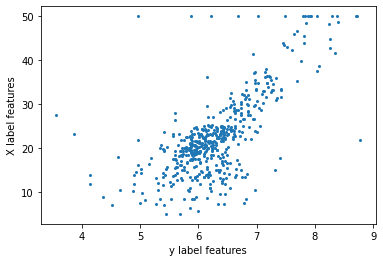

In [ ]:
#model / algorithm
l_reg = linear_model.LinearRegression()

plt.scatter(X.T[5], y, s = 4)
plt.ylabel('y label features')
plt.xlabel('X label features')
plt.show()

Procedendo como antes, vamos separar nossos dados em dados de teste e dados de treino poara o modelo, e executar nosso treino

In [ ]:
#splitting the data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

#training
model  =l_reg.fit(X_train, y_train)
predictions = model.predict(X_test)
print('Predictions: ', predictions)
print('R^2 value: ', l_reg.score(X,y))
print('coefficient factor: ', l_reg.coef_)
print('intercept: ', l_reg.intercept_)

Predictions:  [16.55256228 14.22260089 43.90228099 24.2114291  20.01629562 29.12068629
 20.32940744 24.84839444 15.66801454 13.88662754 18.93600328 12.86369388
 12.9482996  19.23637543 20.12192485 33.26110986 23.5449435  16.23684864
 26.84139265 25.30847368 20.62173363 36.11267743 22.67795875 17.34972679
 21.68566421 22.79822271 24.60299286 18.44510918 20.28327194 31.05869241
 28.30633591 35.75513799 32.51275556 17.67511297 30.95806376 28.50113425
 20.39006374 23.66287179 35.22517546 39.95357977 32.03293872 17.15402451
 17.6091892  24.81426168 20.65716863 25.1893069  10.67681139 32.7102683
 38.80586387 20.22135231 40.36293657 19.93603384  8.28688989 22.21109567
 -4.50124627  4.48650085 28.7044469  19.33907857 19.92913928 23.73308261
 34.60527563 20.46214861 30.67796849 16.85514817 12.66487759  6.70405245
 25.64325284 42.09466247 17.6389036  24.17382446 19.54345978 38.96864313
 13.01917409 25.3609341   4.41269239 27.77095379 28.44560938 27.55788422
 24.07922869  5.51266819 21.65778172 2

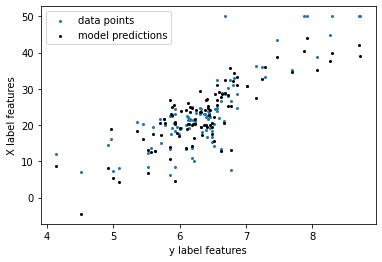

In [ ]:
plt.scatter(X_test.T[5], y_test, s = 4, label = 'data points')
plt.scatter(X_test.T[5], predictions, color="black", s = 4, label = 'model predictions')
plt.ylabel('y label features')
plt.xlabel('X label features')
plt.legend()
plt.show()

### Qual a diferença entre análise de Regressão Linear e análise de Regressão Logística?

Enquanto na Regressão Linear temos uma variável resposta contínua, na **Regressão Logística** nossa variável resposta é **binária**, 0 ou 1, sim ou não. Essa análise é, normalmente, utilizada quando se quer medir a relação de uma variável dependente binária com uma ou mais variáveis independentes, sendo que as independentes tanto podem ser categóricas ou não.

A Regressão Logística é uma análise que nos permite estimar a probabilidade associada à ocorrência de determinado evento em face de um conjunto de variáveis explanatórias. As vantagens desse tipo de regressão incluem: 

(a) facilidade para lidar com variáveis independentes categóricas;

(b) fornece resultados em termos de probabilidade; 

(c) facilidade de classificação de indivíduos em categorias; 

(d) requer pequeno número de suposições;  

(e) possui alto grau de confiabilidade.

Refs e mais material para ler:

- [Regressão Logística](https://pt.wikipedia.org/wiki/Regress%C3%A3o_log%C3%ADstica)

- [Função Logística](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_log%C3%ADstica)



## Algoritmos de Clustering

Os algoritmos de agrupamento, também conhecidos como clustering, fazem parte do que é conhecido como aprendizado de máquina não supervisionado. Isto quer dizer que, a partir de dados “gerais” e sem nenhuma “anotação”, é possível descobrir alguns padrões e criar um modelo que, na prática, vai ser utilizado para classificar um novo conjunto de dados quando ele surgir.

Por exemplo, vamos supor que desejamos classificar clientes em grupos. Os algoritmos de clustering vão analisar os dados e gerar regras internas para dizer se um cliente X pertence a um grupo A, B ou qualquer que seja.

Entretanto, nem sempre podemos apresentar uma descrição significativa e representativa do grupo A ou B, pois mesmo tendo acesso a definição das regras que colocam ou não um dado no grupo, fica complicado caracterizá-lo. Às vezes, fica fácil dizer algo como “este é o grupo do clientes AAA” ou “esta imagem é mais parecida com as imagens que possuem gatos”. Não obstante, quando falamos em conjuntos de dados com muitos atributos, fica complicado atribuir significado aos grupos, que também são chamados de clusters. Esta é uma característica dos algoritmos não supervisionados de clustering: como os padrões são detectados automaticamente nem sempre podemos facilmente explicar o que foi gerado.

### O algoritmo de K-means

K-Means é um algoritmo de clusterização (ou agrupamento) de aprendizado não supervisionado (ou seja, que não precisa de inputs de confirmação externos) que avalia e clusteriza os dados de acordo com suas características, como {lojas/centro logistico}, {clientes/produtos ou serviços semelhantes}, {séries/gênero da série ou faixa etaria}, {paciente/sintoma ou característica semelhante} etc.

* Como funciona? 
 
1 - Primeiro, preciso definir um ‘K’, ou seja, um número de clusters (ou agrupamentos).

2 - Depois, preciso definir, aleatoriamente, um centroide para cada cluster.

3 - O próximo passo é calcular, para cada ponto, o centroide de menor distância. Cada ponto pertencerá ao centroide geométricamente mais próximo a ele.

4 - Agora, devo reposicionar o centróide. A nova posição do centroide deve ser a média da posição de todos os pontos do cluster.

5 - Os dois ultimos passos são repetidos, iterativamente, até obtermos a posição ideal dos centróides.


Para visualziar um pouco melhor o desempenho desse algoritmo, vamos utilizar mais uma vez um dataset de treino imbutido do modulo scikit_learn, agora o nosso dataset irá tratar de dados relacionados a cancer de mama, através de `bc = datasets.load_breast_cancer()`

In [ ]:
from sklearn import datasets
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import scale
import pandas as pd

bc = datasets.load_breast_cancer() 
print(bc)

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]]), 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
 

De antemão, olhando separadamernte para nossos dados:

In [ ]:
X = bc.data
print(X)

[[1.799e+01 1.038e+01 1.228e+02 ... 2.654e-01 4.601e-01 1.189e-01]
 [2.057e+01 1.777e+01 1.329e+02 ... 1.860e-01 2.750e-01 8.902e-02]
 [1.969e+01 2.125e+01 1.300e+02 ... 2.430e-01 3.613e-01 8.758e-02]
 ...
 [1.660e+01 2.808e+01 1.083e+02 ... 1.418e-01 2.218e-01 7.820e-02]
 [2.060e+01 2.933e+01 1.401e+02 ... 2.650e-01 4.087e-01 1.240e-01]
 [7.760e+00 2.454e+01 4.792e+01 ... 0.000e+00 2.871e-01 7.039e-02]]


Perceba que os números dos nossos dados são muito grandes/pequenos, e existe uma diferença enorme entre eles, então vamos reescalonar eles para ajudar mais o nosso algoritmo

In [ ]:
X = scale(bc.data)
print(X)

[[ 1.09706398 -2.07333501  1.26993369 ...  2.29607613  2.75062224
   1.93701461]
 [ 1.82982061 -0.35363241  1.68595471 ...  1.0870843  -0.24388967
   0.28118999]
 [ 1.57988811  0.45618695  1.56650313 ...  1.95500035  1.152255
   0.20139121]
 ...
 [ 0.70228425  2.0455738   0.67267578 ...  0.41406869 -1.10454895
  -0.31840916]
 [ 1.83834103  2.33645719  1.98252415 ...  2.28998549  1.91908301
   2.21963528]
 [-1.80840125  1.22179204 -1.81438851 ... -1.74506282 -0.04813821
  -0.75120669]]


dando continuidade, assim como já fizemos recursivamente em outros métodos até aqui, 

In [ ]:
y = bc.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

model = KMeans(n_clusters = 2, random_state = 0)

model.fit(X_train)

predictions = model.predict(X_test)
labels = model.labels_

print('labels: ', labels)
print('predictions: ', predictions)
print('accuracy: ', accuracy_score(y_test, predictions))
print('actual: ', y_test)

labels:  [1 1 1 0 1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 0 0
 1 1 1 0 0 0 1 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 0 0 1 1 0 0 1 0 1
 1 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 0 0 1 0 0 0 1 0 1 0 1 0 1 1 1 0 0 0 1
 1 0 0 0 1 1 0 1 1 1 1 1 1 0 0 0 0 1 0 0 1 0 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 0 0 0 1 1 1 0 0 1 1 1 0 0 0 1 1 0 1 1 1 1 1 1 1 0 1
 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 0 1 0 1 1 1 0 0 1 1 1 0
 0 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 0 0 0 1 0 1 1 0 1 1 1 0 1 1 1 1 1
 0 1 0 1 1 1 1 1 0 1 0 1 1 1 0 0 0 0 1 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 0 1 1
 0 1 1 1 1 1 1 1 0 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 0 1
 1 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1
 0 0 1 1 0 0 1 0 1 0 1]
predictions:  [1 0 1 1 0 1 0 1 1 0 0 1 0 0 0 1 1 1 1 1 0 1 1 1 0 0 

Rodando várias vezes fica notável o viés binário de acurácia que sujeitamos o algoritmo por dar apenas 0/1 sem labels, no intuito então de tentar melhora isso, faremos o seguinte

In [ ]:
print(pd.crosstab(y_train, labels))

col_0    0    1
row_0          
0      138   32
1       16  269


Apenas a nível de visualização e também de informação, para apresentar uma forma interessante de obter dados de testes para clusters, vamos utilizar agora um pacote do [módulo de  geração de conjuntos de dados](https://scikit-learn.org/stable/datasets/sample_generators.html#sample-generators) do scikit-learn, especificamente o [`sklearn.datasets.make_blobs`](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html#sklearn.datasets.make_blobs)

A ideia aqui vai ser criar 3 centros de blobs aletórios em [[1, 1], [-1, -1], [1, -1]] e preencher blobs de dados ao redor deles, e separar esses blobs através do método de K-Means, no intuito de plotar um gráfico que deixe clara a separaçào feita usando um sistema de cores pré definida.

Text(-3.5, 1.8, 'train time: 0.27s\ninertia: 2470.584849')

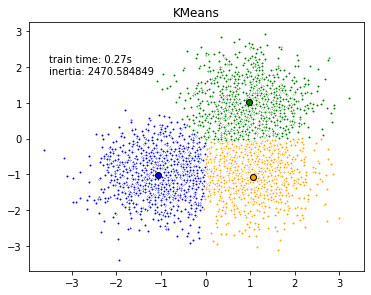

In [ ]:
import numpy as np
from sklearn.datasets import make_blobs
import time
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

#GENERATING DATA
np.random.seed(0)

batch_size = 45
centers = [[1, 1], [-1, -1], [1, -1]]
n_clusters = len(centers)
X, labels_true = make_blobs(n_samples=3000, centers=centers, cluster_std=0.7)

#CLUSTERING WITH KMEANS
k_means = KMeans(init="k-means++", n_clusters=3, n_init=10)
t0 = time.time()
k_means.fit(X)
t_batch = time.time() - t0

fig = plt.figure(figsize=(8, 3))
fig.subplots_adjust(left=0.02, right=2, bottom=0.05, top=1.2)
colors = ["blue", "orange", "green"]

from sklearn.metrics.pairwise import pairwise_distances_argmin

k_means_cluster_centers = k_means.cluster_centers_
k_means_labels = pairwise_distances_argmin(X, k_means_cluster_centers)

# PLOTTING THE RESULT
ax = fig.add_subplot(1, 3, 1)
for k, col in zip(range(n_clusters), colors):
    my_members = k_means_labels == k
    cluster_center = k_means_cluster_centers[k]
    ax.plot(X[my_members, 0], X[my_members, 1], "w", markerfacecolor=col, marker=".")
    ax.plot(
        cluster_center[0],
        cluster_center[1],
        "o",
        markerfacecolor=col,
        markeredgecolor="k",
        markersize=6,
    )
ax.set_title("KMeans")
#ax.set_xticks(())
#ax.set_yticks(())
plt.text(-3.5, 1.8, "train time: %.2fs\ninertia: %f" % (t_batch, k_means.inertia_))


## Neural Networks 
 
Inspirando-se no funcionamento dos neurônios biológicos do sistema nervoso dos animais, estabeleceu-se na área da Inteligência Artificial um modelo computacional de um neurônio conforme ilustrado a seguir: 

![image.png](https://miro.medium.com/max/1128/1*KDiqpWOgtCnO8x3wZJHmDA.png) 

Os sinais da entrada no neurônio são representados pelo vetor $x = [x_1, x_2, x_3, …, x_N]$, podendo corresponder aos pixels de uma imagem, por exemplo. Ao chegarem ao neurônio, são multiplicados pelos respectivos **pesos sinápticos**, que são os elementos do vetor $w = [w_1, w_2, w_3, …, w_N]$, gerando o valor $z$, comumente denominado **potencial de ativação**, de acordo com a expressão:

$$ z = \sum_{i=1}^{N} x_i w_i + b $$

O termo adicional $b$ provê um grau de liberdade a mais, que não é afetado pela entrada nessa expressão, correspondendo tipicamente ao “bias” (viés). O valor $z$ passa então por uma função matemática de ativação $\sigma$, com a característica de ser não linear, responsável por limitar tal valor a um certo intervalo, produzindo o valor final de saída $y$ do neurônio. Algumas funções de ativação usadas são a degrau, sigmoide, tangente hiperbólica, softmax e ReLU (Rectified Linear Unit)

### Criando camadas de neurônios 

Com apenas um neurônio não se pode fazer muita coisa, mas podemos combiná-los em uma estrutura de camadas, cada uma com número diferente de neurônios, formando uma rede neural denominada **Perceptron Multicamadas** (“Multi Layer Perceptron — MLP”). O vetor de valores de entrada $x$ passa pela camada inicial, cujos valores de saída são ligados às entradas da camada seguinte, e assim por diante, até a rede fornecer como resultado os valores de saída da última camada. Pode-se arranjar a rede em várias camadas, tornando-a profunda e capaz de aprender relações cada vez mais complexas.

![image.png](https://miro.medium.com/max/1316/1*H61ieko1YyHzqBNZTzz7IQ.png) 

### Treinamento 

Para que uma rede dessas funcione, é preciso treiná-la. É como ensinar a uma criança o beabá. O treinamento de uma rede MLP insere-se no contexto de **aprendizado de máquina supervisionado**, em que cada amostra de dados utilizada apresenta um rótulo informando a que classificação ela se encaixa. Por exemplo, uma imagem de um cachorro contém um rótulo informando que aquilo é um cachorro. Assim, a ideia geral é fazer com que a rede aprenda os padrões referentes a cada tipo de coisa (cada *classe*), assim, quando uma amostra desconhecida for fornecida à rede, ela seja capaz de estabelecer a qual classe tal amostra pertence. Como isso pode ser feito?

* **Overfitting e Underfitting**

Como mencionamos antes, a incapacidade de um modelo de capturar a verdadeira relação entre variáveis e o objeto a ser predito é o que chamamos de VIÉS (Bias em inglês). Então, quando o erro de viés é alto significa que o modelo não está aprendendo nada.

Por outro lado, se há um viés muito pequeno o modelo fica tão ajustado aos dados de treinamento que quando é usado com dados diferentes acaba errando muito. Aqui entra o conceito de variância.

![image.png](https://miro.medium.com/max/396/1*q_hdLouaSQwUkshCe5rY4Q.png)

Nessa imagem temos a linha azul como sendo o nosso modelo onde queremos separar esse dataset em duas categoriais. Veja que há muitos X vermelhos juntos com as bolinhas, as categorias não foram muito bem separadas, isso significa que o modelo ainda não entendeu a “curva” que ele deveria fazer para categorizar esses dados corretamente. Chamamos isso de Underfitting.

A variância é a sensibilidade de um modelo ao ser usado com outros datasets diferentes do treinamento. Se o modelo é muito sensível aos dados de treinamento, ou seja, identificou tão bem a relação entre os dados de treinamento que quando colocado em teste irá errar justamente a variação que existe entre os datasets. Veja na última imagem como o nosso modelo está acertando absolutamente todos os dados. Chamamos isso de Overfitting.

![image.png](https://miro.medium.com/max/406/1*QfGXli0jP1QDAUuAeWOTeA.png)

O modelo ideal seria então será dado pela curva que melhor representasse os dados de uma forma a encontrar equilibro entre essas duas grandezas aqui apresentadas (viés e variância.). E como podemos encontrar isso?

* **Backpropagation** 

A ideia do algoritmo backpropagation é, com base no **cálculo do erro** ocorrido na camada de saída da rede neural, recalcular o valor dos pesos do vetor $w$ da camada última camada de neurônios e assim proceder para as camadas anteriores, de trás para a frente, ou seja, atualizar todos os pesos $w$ das camadas a partir da última até atingir a camada de entrada da rede, para isso realizando a retropropagação o erro obtido pela rede. Em outras palavras, calcula-se o erro entre o que a rede achou que era e o que de fato era (ex. era um gato e ela achou que era um cachorro), então recalculamos o valor de todos os pesos, começando da última camada e indo até a primeira, sempre tendo em vista diminuir esse erro.

O algoritmo pode ser então colocado da seguinte forma: 

1 - Inicializar todos os pesos da rede com pequenos valores **aleatórios.**

2 - Fornecer dados de entrada à rede e calcular o valor da função de erro/de custo obtida (cost function), ao comparar com o valor de saída esperado. Lembre-se de que como o aprendizado é supervisionado, já se sabe de antemão qual deveria ser a resposta correta. É importante que a função de erro seja **diferenciável**.

3 - Na tentativa de minimizar o valor da função de erro, calculam-se os valores dos **gradientes** para cada peso da rede. Do Cálculo, sabemos que o vetor gradiente fornece a direção de maior crescimento de uma função; aqui, como queremos caminhar com os pesos na direção de maior decréscimo da função de erro, basta tomarmos o sentido contrário ao do gradiente e…voilà! Já temos um excelente caminho por onde andar.

4 - Uma vez que temos o vetor gradiente calculado, atualizamos cada peso de modo **iterativo**, sempre recalculando os gradientes em cada passo de iteração, até o erro diminuir e chegar abaixo de algum limiar preestabelecido, ou o número de iterações atingir um valor máximo, quando enfim o algoritmo termina e a rede está treinada.

A formula geral de atualização dos pesos na iteração fica então da seguinte forma: 

$$ w \Longleftarrow w - \eta \frac{\partial E}{\partial w} $$

Ou seja, o valor do peso na iteração atual será o valor do peso na iteração anterior, corrigido de valor proporcional ao gradiente. O sinal negativo indica que estamos indo na direção contrária à do gradiente, conforme mencionado. O parâmetro $\eta$ representa a taxa de aprendizado da rede neural, controlando a tamanho do passo que tomamos na correção do peso.

Fontes extras: 

* https://medium.com/@tiago.tmleite/neural-networks-multilayer-perceptron-and-the-backpropagation-algorithm-a5cd5b904fde

* https://medium.com/ensina-ai/redes-neurais-roots-1-introdu%C3%A7%C3%A3o-ffdd6f8b9f01

* https://medium.com/ensina-ai/redes-neurais-com-tensorflow-primeiros-passos-20847dd5d27f

## CNN - Convolutional Neural Networks

Uma CNN é um tipo específico de rede neural normalmente utilizada para classificação de imagens. Mas para entendermos uma CNN, é preciso compreender como uma imagem é representada computacionalmente.

Uma imagem preta e branca (grayscale) é representada como uma matrix 2D, em que cada posição da matrix representa um pixel da imagem. Os valores para cada elemento variam entre 0 (preto) até 255 (branco). Já uma imagem colorida, é normalmente representada por uma matrix 3D de forma que seja possível armazenar uma combinação das cores vermelho, verde e azul (RGB).

A ideia principal de uma Rede Convolucional se baseia nisso: filtrar linhas, curvas e bordas e em cada camada acrescida transformar essa filtragem em uma imagem mais complexa. Vamos entender mais detalhadamente nos próximos tópicos.

* Entradas

Quando falamos em reconhecimento/classificação de imagens, as entradas são usualmente matrizes tridimensionais com altura e largura (de acordo com as dimensões da imagem) e profundidade, determinada pela quantidade de canais de cores. Em geral as imagens utilizam três canais, RGB, com os valores de cada pixel.

![image.png](https://miro.medium.com/max/1196/1*VZ2D3BS9avtqzOMvj-9vbQ.png)

* Convoluções 

As convoluções funcionam como filtros que enxergam pequenos quadrados e vão “escorregando” por toda a imagem captando os traços mais marcantes. Explicando melhor, com uma imagem 32x32x3 e um filtro que cobre uma área de 5x5 da imagem com movimento de 2 saltos (chamado de `stride`), o filtro passará pela imagem inteira, por cada um dos canais, formando no final um feature map ou activation map de 28x28x1.

A profundidade da saída de uma convolução é igual a quantidade de filtros aplicados. Quanto mais profundas são as camadas das convoluções, mais detalhados são os traços identificados com o activation map.

O filtro, que também é conhecido por `kernel`, é formado por pesos inicializados aleatoriamente, atualizando-os a cada nova entrada durante o processo de backpropagation. A pequena região da entrada onde o filtro é aplicado é chamada de `receptive field`.

Além do tamanho do filtro e o stride da convolução como hiperparâmetro, quem está modelando uma CNN também tem que escolher como será o `padding`. O padding pode ser nenhum, no qual o output da convolução ficará no seu tamanho original, ou zero pad, onde uma borda é adicionada e preenchida com 0's. O padding serve para que as camadas não diminuam muito mais rápido do que é necessário para o aprendizado.

![image.png](https://miro.medium.com/max/1004/1*Oj4LnMvcbPRw2P9rf7TAgA.png)

* Função de ativação 

As funções de ativação servem para trazer a não-linearidades ao sistema, para que a rede consiga aprender qualquer tipo de funcionalidade. Há muitas funções, como [sigmoid](https://en.wikipedia.org/wiki/Sigmoid_function), [tanh](https://pt.wikipedia.org/wiki/Tangente_hiperb%C3%B3lica) e [softmax](https://pt.wikipedia.org/wiki/Fun%C3%A7%C3%A3o_log%C3%ADstica), mas a mais indicada para redes convolucionais é a [Relu](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)) por ser mais eficiente computacionalmente sem grandes diferenças de acurácia quando comparada a outras funções. Essa função zera todos os valores negativos da saída da camada anterior.

* Pooling 

Uma camada de pooling serve para simplificar a informação da camada anterior. Assim como na convolução, é escolhida uma unidade de área, por exemplo 2x2, para transitar por toda a saída da camada anterior. A unidade é responsável por resumir a informação daquela área em um único valor. Se a saída da camada anterior for 24x24, a saída do pooling será 12x12. Além disso, é preciso escolher como será feita a sumarização. O método mais utilizado é o maxpooling, no qual apenas o maior número da unidade é passado para a saída. Essa sumarização de dados serve para diminuir a quantidade de pesos a serem aprendidos e também para evitar overfitting.

![image.png](https://miro.medium.com/max/1400/1*WvHC5bKyrHa7Wm3ca-pXtg.gif)

Ao final da rede é colocada uma camada Fully connected, onde sua entrada é a saída da camada anterior e sua saída são N neurônios, com N sendo a quantidade de classes do seu modelo para finalizar a classificação.



Material Suplementar: 

* https://medium.com/data-hackers/uma-introdu%C3%A7%C3%A3o-as-redes-neurais-convolucionais-utilizando-o-keras-41ee8dcc033e

* https://medium.com/neuronio-br/entendendo-redes-convolucionais-cnns-d10359f21184

* https://en.wikipedia.org/wiki/Convolutional_neural_network

Para testar um pouco mais os últimos assuntos explicados, vamos criar uma rede neural, especificamente uma convolucional, no intuito de ser capaz de reconhecer digitos numéricos escritos a mão. 

Vamos começar exportando um dataset especificamente criado para essa tarefa, que é muito utilizado no meio de trabalho de CNN. 

O [banco de dados MNIST](https://en.wikipedia.org/wiki/MNIST_database) (banco de dados do Instituto Nacional de Padrões e Tecnologia Modificado) é um grande banco de dados de dígitos manuscritos que é comumente usado para treinar vários sistemas de processamento de imagem. O banco de dados também é amplamente utilizado para treinamento e teste na área de aprendizado de máquina. Ele foi criado "remixando" as amostras dos conjuntos de dados originais do NIST.

Vamos então proceder executando um pip instal desse dataset num formato python friendly, já implementado para essa própria linguagem: 

In [2]:
pip install mnist

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Vamos continuar agora com o código da mesma forma que fizemos com o tratamento e organização de todos os nossos projetos em sklearn até então, identificando o formato do nosso dataset e dividindo ele em parte de treino e parte de teste

In [3]:
from PIL import Image
import numpy as np
from sklearn.neural_network import MLPClassifier 
from sklearn.metrics import confusion_matrix 
import mnist

#TRAINING VARIABLES
X_train = mnist.train_images()
y_train = mnist.train_labels()

X_test = mnist.test_images()
y_test = mnist.test_labels()

print('X_train', X_train)
print('X shape', X_train.shape)

print('y_train', y_train)
print('y shape', y_train.shape)

X_train [[[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 ...

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]

 [[0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  ...
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]
  [0 0 0 ... 0 0 0]]]
X shape (60000, 28, 28)
y_train [5 0 4 ... 5 6 8]
y shape (60000,)


Vamos ajustar o formato do array acima fazendo o seguinte: 

In [4]:
X_train = X_train.reshape((-1, 28*28))
X_test = X_test.reshape((-1, 28*28))

print(X_train.shape)

(60000, 784)


Perceba que se printarmos uma celula inteira, ela tem valores em um range muito grande, algo característico desse formato de dataset, vamos então (assim como já fizemos antes) renormalizar os dados dentro de 0 e 1

In [6]:
print(X_train[0])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

Renormalizando de forma simples:

In [5]:
X_train = np.array(X_train/256)
X_test = np.array(X_test/256)
print(X_train[0])
print(X_train.shape)
print(y_train.shape)

[0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         

Finalmente, vamos prosseguir para a criação e treino do nosso modelo assim como explicamos até aqui. Antes disso, quero pontuar que para rodar esse tipo de rede neural é interessante utilizar um ambiente de execução integrado com GPU's para otimizar a execução do mesmo em ordens de grandeza de tempo, para fazer isso dentro do próprio ambiente de programação do Google Colab, recomendo ir em "Ambiente de execução" (runtime na versão em inglês) >  "Alterar o tipo do ambiente de execução" > "Acelerador de Hardware" e então selecionar GPU. Após esse procedimento feito, podemos seguir com: 

PS.: talvez seja necessário importar as bibliotecas novamente após trocar o ambiente de execução

In [6]:
clf = MLPClassifier(solver='adam', activation='relu', hidden_layer_sizes=(64, 64))

clf.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(64, 64))

De posse do modelo treinado, podemos fazer como antes e calcular a sua acurácia usando os dados que separamos para teste no nosso dataset

In [7]:
prediction = clf.predict(X_test)
acc = confusion_matrix(y_test, prediction)

print(acc)

[[ 966    0    0    1    1    2    4    2    2    2]
 [   0 1126    2    1    0    1    2    1    2    0]
 [   3    1 1002    8    4    0    1    5    8    0]
 [   0    1    4  988    0    7    0    5    3    2]
 [   1    0    5    0  960    0    5    2    2    7]
 [   2    0    0   14    1  866    2    0    5    2]
 [   4    3    1    1    8    8  931    0    2    0]
 [   0    4    6    2    2    0    0 1007    3    4]
 [   4    0    3    8    2    4    0    3  945    5]
 [   3    2    0    4    8    3    0    6    2  981]]


Perceba que dessa vez, devido ao numero diferente de dimensões dos nossos dados obtivemos uma matriz de acurácia - Como esperado!- Podemos então proceder para o cálculo de um valor de acurácia que podemos interpretar melhor seguindo a formula mencionada em nossos materiais suplementares para esse modelo, calculando então o traço da matriz dividido pela soma de todos seus elementos juntos. 

Para isso, definimos a seguinte função e voilá!

In [9]:
def accuracy(cm):
  diagonal = cm.trace()
  elements = cm.sum()
  return diagonal/elements

print('model accuracy (%): ', accuracy(acc)) 

0.9772


Salvando o modelo para não precisar treinar ele novamente em um ambiente de execução dedicado: 




In [11]:
import joblib 

filename = 'cnn_model.sav'
joblib.dump(clf,filename)


['cnn_model.sav']

Para abrir o modelo acima novamente sem a necessidade de rodar o fit inteiro novamente, basta executar:

In [ ]:
clf = joblib.load(filename) 

Você pode agora testar ele por si mesmo! Basta escrever um número no GIMP ou Paint, salvar ele como imagem e transformar essa imagem numa matriz de dados. Podemos inclusive fazer isso através de um simlpes programa em python, perceba 

```Python
from PIL import Image

img  = Image.open('name_of_the_image.png')

data = list(img.getdata())
print(data)
```

Vai nos dar um array com um base numero alto (eg 255), após isso podemos então pegar esse número e rodar ele novamente no seguinte formato

```Python
from PIL import Image

img  = Image.open('name_of_the_image.png')

data = list(img.getdata())
for i in range(len(data)):
  data[i] = 255 - data[i]
print(data)
```

então podemos utilizar esse array ajustado para avaliar a precisão do nosso modelo 


```Python
number = [data]
number = np.array(number)/256

p = clf.predict([number])
print(p)
```